In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score

def calculate_cohens_kappa(csv_path):
    data = pd.read_csv(csv_path)

    # skip the 'ChunkName' column
    columns = data.columns[1:]

    kappa_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)

    # Calculate Cohen's kappa for each pair of columns
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            kappa_score = cohen_kappa_score(data[columns[i]], data[columns[j]])
            kappa_matrix.at[columns[i], columns[j]] = kappa_score
            kappa_matrix.at[columns[j], columns[i]] = kappa_score

    # Fill diagonal with 1, as kappa of a rater with themselves is perfect agreement
    np.fill_diagonal(kappa_matrix.values, 1)
    
    return kappa_matrix

csv_path = 'Marks\Processed\TSI Merged.csv'
kappa_matrix = calculate_cohens_kappa(csv_path)
print(kappa_matrix)


          Human 1   Human 2   Human 3   Human 4   Human 5     Model
Human 1  1.000000  0.310010  0.391304  0.711443  0.461078 -0.097436
Human 2  0.310010  1.000000  0.599332  0.391172  0.406558  0.067599
Human 3  0.391304  0.599332  1.000000  0.450382  0.345418 -0.011494
Human 4  0.711443  0.391172  0.450382  1.000000  0.669670  0.032099
Human 5  0.461078  0.406558  0.345418  0.669670  1.000000 -0.004975
Model   -0.097436  0.067599 -0.011494  0.032099 -0.004975  1.000000


In [3]:
import pandas as pd
from statsmodels.stats.inter_rater import fleiss_kappa

def calculate_fleiss_kappa_for_humans(csv_path):
    data = pd.read_csv(csv_path)

    # Extract only human rater columns
    columns = data.columns[1:6]

    # Convert data to a format suitable for Fleiss' kappa: a matrix with shape (subjects, categories)
    formatted_data = data[columns].apply(pd.value_counts, axis=1).fillna(0)
    kappa_value = fleiss_kappa(formatted_data, method='fleiss')

    return kappa_value

csv_path = 'Marks\\Processed+ReactionTime\\Huberman Humans and model no average.csv'
kappa_value_humans = calculate_fleiss_kappa_for_humans(csv_path)
print("Fleiss' Kappa for Humans: ", kappa_value_humans)

Fleiss' Kappa:  0.15504255982887338


C:\Users\ojmar\AppData\Local\Temp\ipykernel_12372\1664096214.py:14: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  formatted_data = data[columns].apply(pd.value_counts, axis=1).fillna(0)


In [4]:
import pandas as pd
from statsmodels.stats.inter_rater import fleiss_kappa

def calculate_fleiss_kappa_human_vs_model(csv_path):
    data = pd.read_csv(csv_path)

    # Calculate the average human score
    human_columns = data.columns[1:6]
    data['Average Human'] = data[human_columns].mean(axis=1).round().astype(int)

    columns = ['Average Human', 'Model']

    # Convert data to a format suitable for Fleiss' kappa: a matrix with shape (subjects, categories)
    formatted_data = data[columns].apply(pd.value_counts, axis=1).fillna(0)
    kappa_value = fleiss_kappa(formatted_data, method='fleiss')

    return kappa_value

csv_path = 'Marks\\Processed+ReactionTime\\Huberman Humans and model no average.csv'
kappa_value_avg_human_vs_model = calculate_fleiss_kappa_human_vs_model(csv_path)
print("Fleiss' Kappa for Average Human vs Model: ", kappa_value_avg_human_vs_model)


Fleiss' Kappa for Average Human vs Model:  -0.015228426395941184


C:\Users\ojmar\AppData\Local\Temp\ipykernel_12372\2206804657.py:16: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  formatted_data = data[columns].apply(pd.value_counts, axis=1).fillna(0)


In [4]:
import pandas as pd
import numpy as np

def calculate_percent_agreement(csv_path):
    data = pd.read_csv(csv_path)

    # skip the 'ChunkName' column
    columns = data.columns[1:]

    agreement_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)

    # Calculate Percent Agreement for each pair of columns
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            agreement = np.mean(data[columns[i]] == data[columns[j]]) * 100
            agreement_matrix.at[columns[i], columns[j]] = agreement
            agreement_matrix.at[columns[j], columns[i]] = agreement

    # Fill diagonal with 100, as agreement of a rater with themselves is perfect
    np.fill_diagonal(agreement_matrix.values, 100)
    
    return agreement_matrix

csv_path = 'Marks\Processed\Multi Single Human Run.csv'
agreement_matrix = calculate_percent_agreement(csv_path)
print(agreement_matrix)


              Prediction 1  Prediction 2  Prediction 3  Prediction 4  \
Prediction 1         100.0          67.5          78.0          80.5   
Prediction 2          67.5         100.0          75.5          76.0   
Prediction 3          78.0          75.5         100.0          81.5   
Prediction 4          80.5          76.0          81.5         100.0   
Prediction 5          70.0          70.5          68.0          72.5   

              Prediction 5  
Prediction 1          70.0  
Prediction 2          70.5  
Prediction 3          68.0  
Prediction 4          72.5  
Prediction 5         100.0  


              Prediction 1  Prediction 2  Prediction 3  Prediction 4  \
Prediction 1      1.000000      0.371495      0.559604      0.614167   
Prediction 2      0.371495      1.000000      0.511855      0.497066   
Prediction 3      0.559604      0.511855      1.000000      0.630443   
Prediction 4      0.614167      0.497066      0.630443      1.000000   
Prediction 5      0.416286      0.331217      0.361978      0.428749   

              Prediction 5  
Prediction 1      0.416286  
Prediction 2      0.331217  
Prediction 3      0.361978  
Prediction 4      0.428749  
Prediction 5      1.000000  


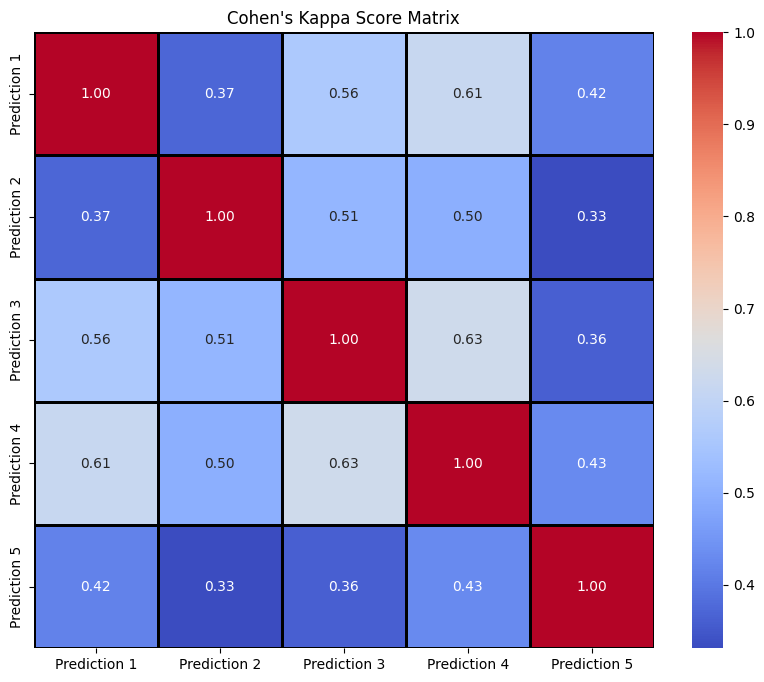

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_cohens_kappa(csv_path):
    data = pd.read_csv(csv_path)

    # skip the 'ChunkName' column
    columns = data.columns[1:]

    kappa_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)

    # Calculate Cohen's kappa for each pair of columns
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            kappa_score = cohen_kappa_score(data[columns[i]], data[columns[j]])
            kappa_matrix.at[columns[i], columns[j]] = kappa_score
            kappa_matrix.at[columns[j], columns[i]] = kappa_score

    # Fill diagonal with 1, as kappa of a rater with themselves is perfect agreement
    np.fill_diagonal(kappa_matrix.values, 1)
    
    return kappa_matrix

def plot_kappa_matrix(kappa_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(kappa_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=1, linecolor='black')
    plt.title('Cohen\'s Kappa Score Matrix')
    plt.show()

csv_path = 'Marks\Processed\Multi Single Human Run.csv'
kappa_matrix = calculate_cohens_kappa(csv_path)
print(kappa_matrix)
plot_kappa_matrix(kappa_matrix)


In [25]:
import pandas as pd
import krippendorff

def calculate_krippendorff_alpha(file_path):
    data = pd.read_csv(file_path)
    
    columns_of_interest = [
        'Prolongation', 'Block', 'SoundRep', 'WordRep','Interjection'
    ]
    
    # Extract only the necessary columns
    annotations = data[columns_of_interest]
    
    # Convert the data to the format needed by krippendorff.alpha
    # Transpose and convert DataFrame to numpy array for computation
    reliability_data = annotations.T.to_numpy()
    alpha = krippendorff.alpha(reliability_data=reliability_data, level_of_measurement='nominal')
    
    return alpha

file_path = r'C:\Users\ojmar\Documents\Uni\Synoptic Project\StammerScore\Data\combined_and_filtered_strict_output_full.csv'
alpha_value = calculate_krippendorff_alpha(file_path)
print("Krippendorff's Alpha:", alpha_value)


Krippendorff's Alpha: 0.017235642443123034


- Alpha = 1: Perfect agreement among raters.
- Alpha > 0.8: Strong agreement, generally considered acceptable for drawing conclusions from the data.
- Alpha > 0.67: Moderate agreement, sufficient for tentative conclusions to be drawn.
- Alpha > 0.0: Marginal agreement; the reliability of the data might be questionable for some purposes.
- Alpha = 0: Agreement equivalent to chance.
- Alpha < 0: Disagreement among raters; the raters are systematically contradicting each other.

In [26]:
import pandas as pd
from statsmodels.stats.inter_rater import fleiss_kappa

def calculate_fleiss_kappa(file_path):
    data = pd.read_csv(file_path)
    
    # skip the 'ChunkName' column
    ratings_matrix = data.iloc[:, 1:]
    rating_counts = ratings_matrix.apply(pd.Series.value_counts, axis=1).fillna(0)
    
    if 0 not in rating_counts.columns:
        rating_counts[0] = 0
    if 1 not in rating_counts.columns:
        rating_counts[1] = 0
    
    rating_counts = rating_counts[[0, 1]]
    kappa = fleiss_kappa(rating_counts.values, method='fleiss')

    return kappa

file_path = r'C:\Users\ojmar\Documents\Uni\Synoptic Project\StammerScore\Evaluation\Marks\Processed+ReactionTime\only_human_predictions.csv'
kappa_value = calculate_fleiss_kappa(file_path)
print("Fleiss' Kappa:", kappa_value)


Fleiss' Kappa: 0.5101727310808659


- 0 to 0.20: Slight agreement
- 0.21 to 0.40: Fair agreement
- 0.41 to 0.60: Moderate agreement
- 0.61 to 0.80: Substantial agreement
- 0.81 to 1.00: Almost perfect agreement